#NNDL

##Lab - 3

##Submitted by: Johanan Joshua (2347119)

#Question:

Develop a neural network using backpropagation to classify images from the CIFAR-10
dataset.

The dataset contains 60,000 32x32 color images divided into 10 classes
(airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).
Your objective is to build a neural network model, train it using backpropagation, and
evaluate its performance.

You can download the dataset

https://www.kaggle.com/c/cifar-10/

https://www.cs.toronto.edu/~kriz/cifar.html


Instructions:

##1. Data Preprocessing:

-- Load the CIFAR-10 dataset.

-- Perform necessary data preprocessing steps:

▪ Normalize pixel values to range between 0 and 1.

▪ Convert class labels into one-hot encoded format.

▪ Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).

▪ Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.


##2. Network Architecture Design:

-- Design a feedforward neural network to classify the images.

▪ Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.

▪ Hidden Layers: Use appropriate layers.

▪ Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.


Question:

-- Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

##3. Activation Functions:

-- Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).

-- Explain why you selected a particular activation function and its role in
the backpropagation process.

##4. Loss Function and Optimizer:

-- Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.

-- Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.

Question:

-- How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?


##5. Training the Model:

-- Implement backpropagation to update the weights and biases of the
network during training.

-- Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

Question:


-- How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

##6. Model Evaluation:

-- After training, evaluate the performance of your model on the test set.

-- Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

Question:

-- How can you further improve model performance if the accuracy is low?

##7. Optimization Strategies:

-- Discuss optimization strategies such as:


▪ Early stopping to prevent overfitting.

▪ Learning rate scheduling for smoother convergence.

▪ Weight initialization techniques to ensure efficient learning.

Question:

-- Why is weight initialization important, and how does it impact the
convergence of your network?

##8. Report:

-- Provide a detailed report/documentation that includes (in Colab file):

▪ The architecture of the network and justifications for the choices
made.

▪ Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.

▪ Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).

▪ A brief discussion of the challenges you faced and how you
addressed them.

Deliverables:

• Submit your code along with documentation (as a Google Colab file and Github
link).

• Include comments in your code explaining each step clearly.

• The Colab file should also contain performance metrics and any visualizations
(such as training curves or confusion matrices) that demonstrate the model’s
effectiveness.

#Solution:

#1. Data Preprocessing:

##Steps:

-- Load the CIFAR-10 dataset.

-- Perform necessary data preprocessing steps:

▪ Normalize pixel values to range between 0 and 1.

▪ Convert class labels into one-hot encoded format.

▪ Split the dataset into training and test sets (e.g., 50,000 images for training and 10,000 for testing).

▪ Optionally, apply data augmentation techniques (such as random flips, rotations, or shifts) to improve the generalization of the model.

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the dataset into training and test sets
# The CIFAR-10 dataset, by default, is already split into 50,000 training images and 10,000 testing images.

# Optionally apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,          # Randomly rotate images by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10%
    height_shift_range=0.1,     # Randomly shift images vertically by 10%
    horizontal_flip=True        # Randomly flip images horizontally
)
datagen.fit(x_train)

# Print shapes to confirm data preprocessing
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


#2. Network Architecture Design:

##Steps:

-- Design a feedforward neural network to classify the images.

▪ Input Layer: The input shape should match the 32x32x3 dimensions of the CIFAR-10 images.

▪ Hidden Layers: Use appropriate layers.

▪ Output Layer: The final layer should have 10 output neurons (one for each class) with a softmax activation function for multi-class classification.



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature map and feed it to a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='tanh'))

# Output Layer
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

**Question:**

-- Justify your choice of network architecture, including the number of layers, types of layers, and the number of neurons/filters in each layer.

**Answer:**

Architecture:

*Input Layer*: 32x32x3 (RGB image).

*Convolutional Layers*: To detect patterns like edges, colors, or textures.

*Pooling Layers*: To downsample the image and reduce complexity.

*Fully Connected Layers*: To classify the extracted features into categories.

*Output Layer*: 10 neurons with softmax activation for multi-class classification.


**Justification**

*Convolutional layers* help in automatically learning filters for feature extraction.

*Pooling layers* reduce the number of parameters and computational load.

*Fully connected layers* consolidate the extracted features into final class scores.

#3. Activation Functions:

**-- Choose any two appropriate activation functions for the hidden layers (e.g., ReLU, sigmoid, or tanh).**

ReLU and tanh Activation function is choosen (Both are implemented in the previous step)

**-- Explain why you selected a particular activation function and its role in the backpropagation process.**

ReLU (Rectified Linear Unit) is efficient for preventing the vanishing gradient problem during backpropagation by allowing faster learning.

tanh ensures that the values are centered around zero, which can improve convergence in some cases.

Role in Backpropagation:

ReLU: ReLU mitigates the vanishing gradient problem (which is common with Sigmoid and Tanh) because its gradient does not saturate (except for the zero output case).ReLU deactivates neurons when the input is negative (output is 0), making the model sparse and more computationally efficient.

tanh: can be useful in cases where the input data is centered around zero, but it may suffer from the vanishing gradient problem in deeper layers.



In [12]:
# ReLU and tanh Activation functions are implemented in the previous step

#4. Loss Function and Optimizer

**-- Use any two loss functions and compare with the categorical cross entropy since this is a multi-class classification problem.**

The most suitable loss function for multi-class classification is categorical crossentropy. You could compare this with:

*1. Mean Squared Error (MSE)*: Not ideal for classification but used to compare performance.
  
*2. Sparse Categorical Crossentropy*: Another variant of cross-entropy when the labels are integers.

**-- Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain how the learning rate affects the backpropagation process.**

Use Adam optimizer due to its adaptive learning rate and ability to handle sparse gradients.

  


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Question:**

-- How does the choice of optimizer and learning rate influence the convergence of the network? How would you adjust the learning rate if the model is not converging properly?

**Answer:**

Effect of Optimizer & Learning Rate:

Adam adjusts the learning rate dynamically, leading to faster convergence.

If the model isn't converging, reduce the learning rate to allow for finer updates.

#5. Training the Model:

-- Implement backpropagation to update the weights and biases of the network during training.

-- Train the model for a fixed number of epochs (e.g., 10 epochs) and monitor the training and validation accuracy.


In [16]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.6705 - loss: 0.9334 - val_accuracy: 0.7096 - val_loss: 0.8486
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 151ms/step - accuracy: 0.6837 - loss: 0.9030 - val_accuracy: 0.6995 - val_loss: 0.8517
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 147ms/step - accuracy: 0.6911 - loss: 0.8785 - val_accuracy: 0.7116 - val_loss: 0.8331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 129ms/step - accuracy: 0.6968 - loss: 0.8635 - val_accuracy: 0.7197 - val_loss: 0.8094
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 129ms/step - accuracy: 0.7041 - loss: 0.8410 - val_accuracy: 0.7162 - val_loss: 0.8390
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 132ms/step - accuracy: 0.7102 - loss: 0.8270 - val_accuracy: 0.7356 - val_loss: 0.7582
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 132ms/step - accuracy: 0.7167 - loss: 0.8031 - val_accuracy: 0.7214 - val_loss: 0.8155
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.7241 -

**Question:**

-- How does backpropagation update the weights in each layer, and what role does the learning rate play in this process?

**Answer:**

Backpropagation & Learning Rate:

Backpropagation updates the weights in each layer by calculating the gradient of the loss with respect to the weights and adjusting them using the learning rate.

The learning rate determines how large these weight updates are. If it's too high, the model may overshoot optimal points; if too low, it might converge slowly

#6. Model Evaluation:

-- After training, evaluate the performance of your model on the test set.

-- Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7423 - loss: 0.7572
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1000
           1       0.76      0.92      0.83      1000
           2       0.77      0.58      0.66      1000
           3       0.64      0.47      0.54      1000
           4       0.77      0.65      0.70      1000
           5       0.69      0.60      0.64      1000
           6       0.68      0.90      0.77      1000
           7       0.72      0.84      0.78      1000
           8       0.89      0.79      0.84      1000
           9       0.82      0.80      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



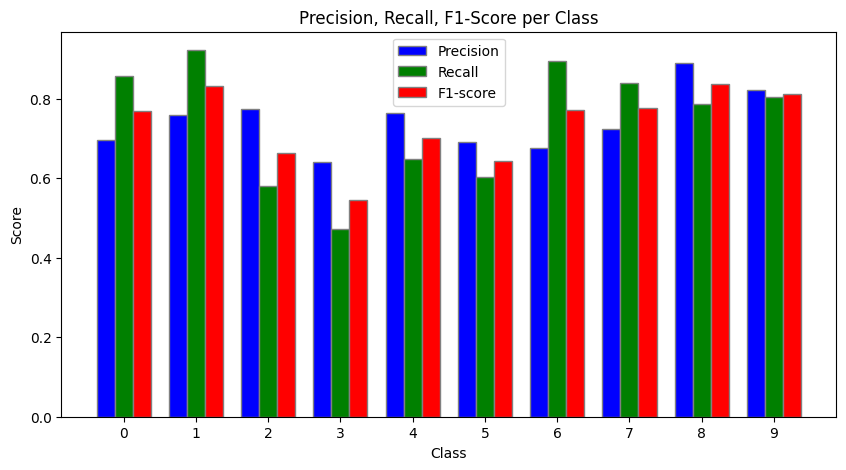

----------------------------------------------------------


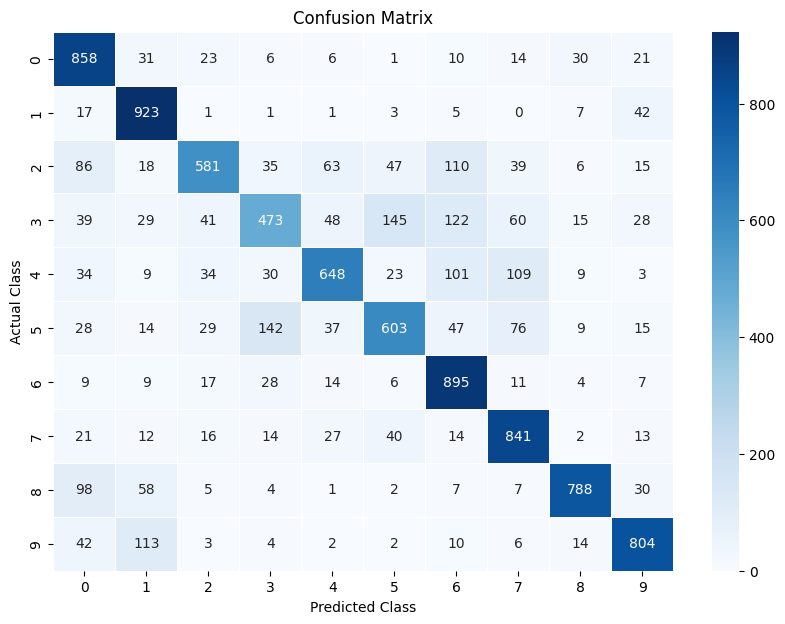

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Visualizing the classification report as a bar chart
from sklearn.metrics import precision_recall_fscore_support
metrics = precision_recall_fscore_support(y_true, y_pred_classes, average=None, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Extract precision, recall, and F1-score for each class
precision = metrics[0]
recall = metrics[1]
f1_score = metrics[2]
classes = list(range(10))

# Plotting Precision, Recall, and F1-score for each class
plt.figure(figsize=(10, 5))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=barWidth, edgecolor='grey', label='F1-score')

# Adding labels
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.title('Precision, Recall, F1-Score per Class')
plt.legend()
plt.show()

print("----------------------------------------------------------")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualization of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()



**Question:**

-- How can you further improve model performance if the accuracy is low?

**Answer:**

Data Augmentation: Introduce variations in the data to reduce overfitting.

More Complex Architectures: Add more layers or filters to improve feature extraction.

#7. Optimization Strategies:

**Early Stopping:** Stop training when validation accuracy no longer improves.

**Learning Rate Scheduling:** Gradually decrease the learning rate to allow finer convergence.

**Weight Initialization:** Start with weights near zero, but not zero, to ensure symmetry breaking and efficient learning.

**Weight Initialization Importance:**

Poor initialization can cause vanishing/exploding gradients.

Techniques like He initialization for ReLU layers can help achieve faster convergence.

**Question**:

-- Why is weight initialization important, and how does it impact the
convergence of your network?

**Answer:**

**Importance of Weight Initialization and Its Impact on Convergence**

*1. Learning Diversity:*Proper weight initialization breaks symmetry, enabling neurons to learn unique features and improving model performance.

*2. Avoids Gradient Issues:* It prevents vanishing gradients (too small) and exploding gradients (too large), which can hinder effective learning and convergence.

*3. Faster Convergence*: Good initialization allows the model to reach optimal weights more quickly, speeding up the training process.

*4. Better Generalization:* Properly initialized weights enhance the model’s ability to generalize to unseen data, leading to improved overall performance.

*5. Stable Learning*: Effective weight initialization results in more stable updates during training, reducing fluctuations and increasing the reliability of the model's performance.